In [2]:
import pandas as pd

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\PAID PROJECTS\Rudra da 2\disease.csv")
data

,YearStart,LocationDesc,Topic,Question,Data_Value,Stratification2,StratificationID1,StratificationID2
0,2021,West,Arthritis among older adults,Percentage of older adults ever told they have...,31.6,Hispanic,AGE_OVERALL,HIS
1,2017,Northeast,Arthritis among older adults,Percentage of older adults ever told they have...,50.3,NaN,65PLUS,OVERALL
2,2019,Midwest,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,14.3,NaN,AGE_OVERALL,OVERALL
3,2020,"United States, DC & Territories",Arthritis among older adults,Percentage of older adults ever told they have...,55.5,Female,65PLUS,FEMALE
4,2020,New Hampshire,Frequent mental distress,Percentage of older adults who are experiencin...,15.2,Female,5064,FEMALE
...,...,...,...,...,...,...,...,...
250932,2015,West Virginia,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,Asian/Pacific Islander,AGE_OVERALL,ASN
250933,2015,Oklahoma,Recent activity limitations in past month,Mean number of days with activity limitations ...,7.1,"Black, non-Hispanic",5064,BLK
250934,2017,New Hampshire,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,21.9,NaN,AGE_OVERALL,OVERALL
250935,2015,Virginia,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,NaN,Hispanic,65PLUS,HIS


In [5]:
data.head()

,YearStart,LocationDesc,Topic,Question,Data_Value,Stratification2,StratificationID1,StratificationID2
0,2021,West,Arthritis among older adults,Percentage of older adults ever told they have...,31.6,Hispanic,AGE_OVERALL,HIS
1,2017,Northeast,Arthritis among older adults,Percentage of older adults ever told they have...,50.3,NaN,65PLUS,OVERALL
2,2019,Midwest,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,14.3,NaN,AGE_OVERALL,OVERALL
3,2020,"United States, DC & Territories",Arthritis among older adults,Percentage of older adults ever told they have...,55.5,Female,65PLUS,FEMALE
4,2020,New Hampshire,Frequent mental distress,Percentage of older adults who are experiencin...,15.2,Female,5064,FEMALE


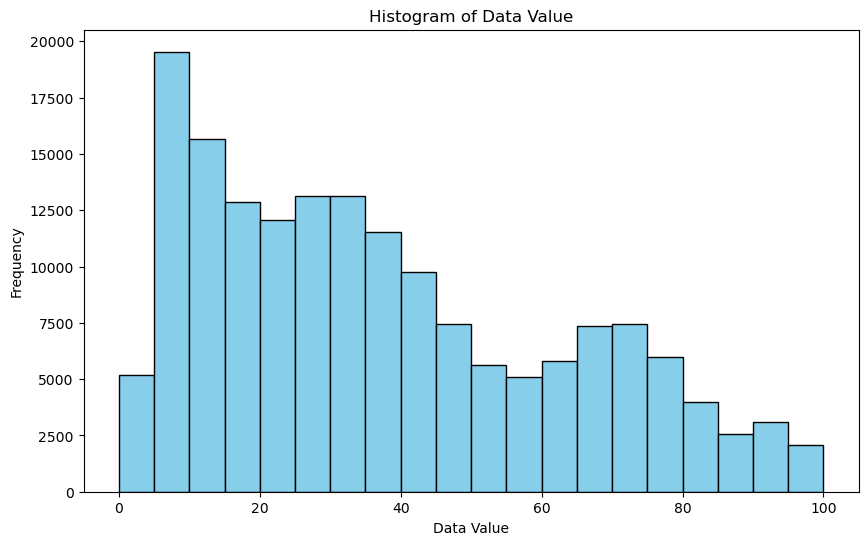

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Data_Value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data Value')
plt.show()



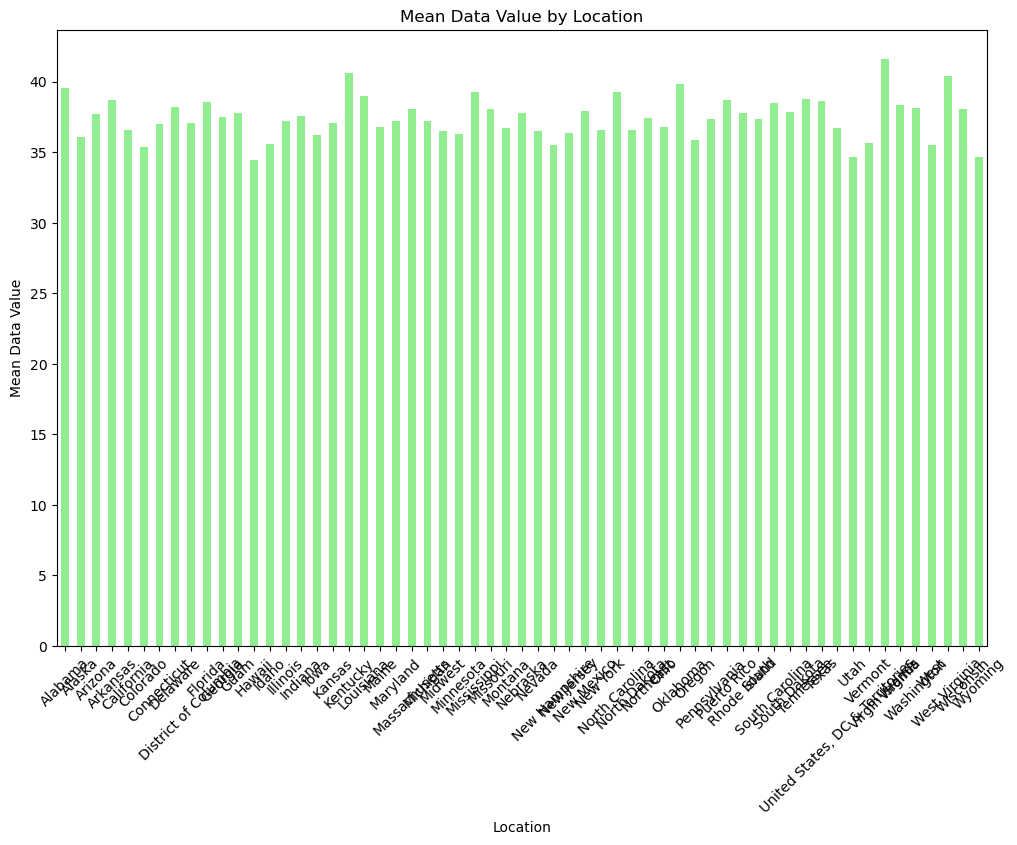

In [14]:
plt.figure(figsize=(12, 8))
data.groupby('LocationDesc')['Data_Value'].mean().plot(kind='bar', color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.title('Mean Data Value by Location')
plt.xticks(rotation=45)
plt.show()



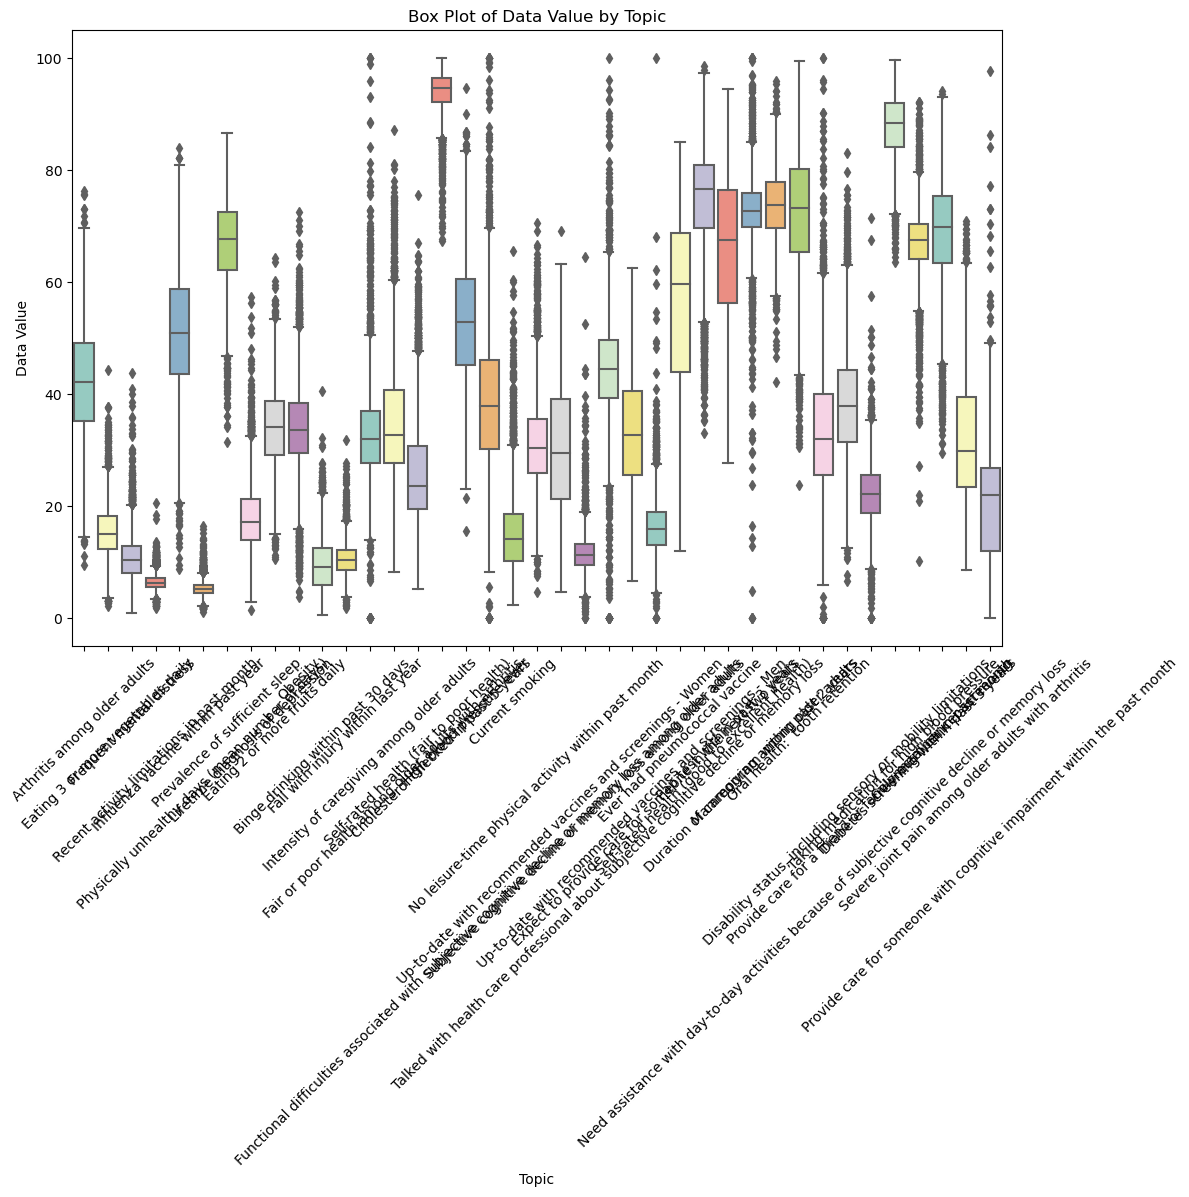

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Topic', y='Data_Value', palette='Set3')
plt.xlabel('Topic')
plt.ylabel('Data Value')
plt.title('Box Plot of Data Value by Topic')
plt.xticks(rotation=45)
plt.show()


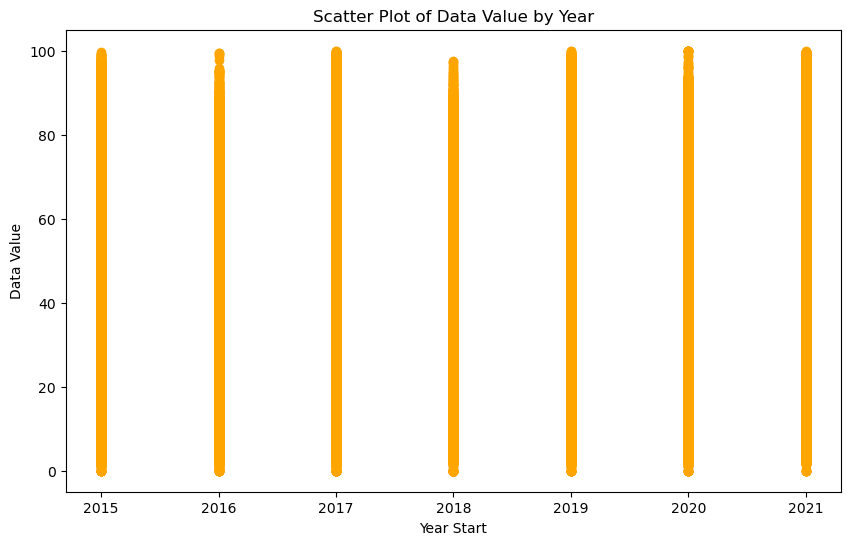

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['YearStart'], data['Data_Value'], color='orange')
plt.xlabel('Year Start')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Data Value by Year')
plt.show()



In [68]:
data.describe()

,YearStart,Data_Value
count,250937.000000,169302.000000
mean,2017.940933,37.328349
std,2.031564,25.213181
min,2015.000000,0.000000
25%,2016.000000,15.700000
50%,2018.000000,32.300000
75%,2020.000000,56.000000
max,2021.000000,100.000000


In [19]:
#summary statistics
mean_data_value = data['Data_Value'].mean()
median_data_value = data['Data_Value'].median()
std_data_value = data['Data_Value'].std()



In [20]:
mean_data_value

37.32834874957177

In [21]:
median_data_value

32.3

In [22]:
std_data_value

25.213180584102542

In [23]:
#grouped summary statistics
grouped_mean_data_value = data.groupby('Stratification2')['Data_Value'].mean()
grouped_median_data_value = data.groupby('Stratification2')['Data_Value'].median()


In [24]:
grouped_mean_data_value

Stratification2
Asian/Pacific Islander      38.056350
Black, non-Hispanic         40.202450
Female                      36.904194
Hispanic                    39.768005
Male                        34.709825
Native Am/Alaskan Native    43.012372
White, non-Hispanic         36.481668
Name: Data_Value, dtype: float64

In [25]:
grouped_median_data_value

Stratification2
Asian/Pacific Islander      31.2
Black, non-Hispanic         38.4
Female                      31.5
Hispanic                    38.5
Male                        28.3
Native Am/Alaskan Native    42.8
White, non-Hispanic         29.5
Name: Data_Value, dtype: float64

In [26]:
correlation = data[['YearStart', 'Data_Value']].corr().iloc[0, 1]
correlation

0.023148896374849598

In [27]:
# Specify non-numeric columns to exclude
non_numeric_columns_to_exclude = ['LocationDesc', 'Topic', 'Question', 'Stratification2', 'StratificationID1', 'StratificationID2']

# Drop specified non-numeric columns from your dataset
data_numeric = data.drop(columns=non_numeric_columns_to_exclude)




In [28]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['LocationDesc', 'Topic', 'Question', 'Stratification2',
       'StratificationID1', 'StratificationID2'],
      dtype='object')


In [29]:
# Specify non-numeric columns to exclude
non_numeric_columns_to_exclude = ['LocationDesc', 'Topic', 'Question', 'Stratification2', 'StratificationID1', 'StratificationID2']

# Drop specified non-numeric columns from your dataset and assign the result to data_numeric
data_numeric = data.drop(columns=non_numeric_columns_to_exclude)

# If you want to modify the original DataFrame in place, you can use inplace=True
# data.drop(columns=non_numeric_columns_to_exclude, inplace=True)

# Print the resulting DataFrame to verify
print(data_numeric)



        YearStart  Data_Value
0            2021        31.6
1            2017        50.3
2            2019        14.3
3            2020        55.5
4            2020        15.2
...           ...         ...
250932       2015         NaN
250933       2015         7.1
250934       2017        21.9
250935       2015         NaN
250936       2015        28.9

[250937 rows x 2 columns]


In [37]:
# Check and handle missing values in features and target variables
X_train = X_train.dropna()
y_train = y_train.dropna()

X_test = X_test.dropna()
y_test = y_test.dropna()

# Ensure both features and target variables have the same number of rows
min_samples = min(len(X_train), len(y_train), len(X_test), len(y_test))

X_train = X_train[:min_samples]
y_train = y_train[:min_samples]

X_test = X_test[:min_samples]
y_test = y_test[:min_samples]

# Now, both features and target variables have the same number of samples




In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance (using Mean Squared Error for regression)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 638.5708287196485


In [43]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training target variable and transform both training and testing target variables
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Now you can proceed with training your k-NN model



In [44]:
#K Nearest neighbour
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the k-NN regressor model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the k-NN model
knn.fit(X_train, y_train_imputed)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model performance (using Mean Squared Error for regression)
mse = mean_squared_error(y_test_imputed, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 580.6114282695175


In [46]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training target variable and transform both training and testing target variables
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Now you can proceed with training your classification or decision tree model





In [48]:
# Assuming 'y_train' and 'y_test' are continuous target variables
# Convert them to discrete classes or categories based on thresholds or bins

# Example: Convert to binary classes based on a threshold (e.g., 0.5)
y_train_classes = (y_train > 0.5).astype(int)
y_test_classes = (y_test > 0.5).astype(int)

# Now, 'y_train_classes' and 'y_test_classes' represent binary classes (0 or 1) for classification



In [49]:
#For classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Decision Tree classifier model
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier model
dt_classifier.fit(X_train, y_train_classes)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test_classes, y_pred)
report = classification_report(y_test_classes, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.675161393161712
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     16303
           1       0.68      1.00      0.81     33885

    accuracy                           0.68     50188
   macro avg       0.34      0.50      0.40     50188
weighted avg       0.46      0.68      0.54     50188



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#For regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Decision Tree regressor model
dt_regressor = DecisionTreeRegressor()

# Train the Decision Tree regressor model
dt_regressor.fit(X_train, y_train_imputed)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate model performance (using Mean Squared Error for regression)
mse = mean_squared_error(y_test_imputed, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 647.0704626005048


In [52]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training target variable and transform both training and testing target variables
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Now you can proceed with training your neural network or performing cluster analysis



In [54]:
#Neuralnetworks
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)

# Train the MLPRegressor model
mlp.fit(X_train, y_train_imputed)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate model performance (using Mean Squared Error for regression)
mse = mean_squared_error(y_test_imputed, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 433.8072275065882


In [55]:
#cluster analysis
from sklearn.cluster import KMeans

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model
kmeans.fit(X_train)

# Get cluster labels
cluster_labels = kmeans.labels_
print("Cluster Labels:", cluster_labels)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [1 1 1 ... 1 2 1]
